In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
sns.set_palette('husl')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [3]:
# Load the processed data
processed_data_path = "FINAL_PROCESSED_DATA.csv"

try:
    df = pd.read_csv(processed_data_path)
    print(f"Successfully loaded data with shape: {df.shape}")
    print(f"\nNumber of unique batteries: {df['battery_id'].nunique()}")
    print(f"\nColumns in the dataset:")
    for col in df.columns:
        print(f"- {col}")
except FileNotFoundError:
    print(f"Error: Could not find {processed_data_path}")
    print("Please run process_data.py first to generate the processed data.")

Successfully loaded data with shape: (8220, 36)

Number of unique batteries: 23

Columns in the dataset:
- battery_id
- cycle_number
- is_reference_cycle
- internal_resistance_ohm
- discharge_duration_s
- capacity_Ah
- energy_Wh
- avg_current_A
- avg_voltage_V
- start_voltage_V
- end_voltage_V
- delta_voltage_V
- avg_temp_C
- start_temp_C
- end_temp_C
- delta_temp_C
- max_temp_C
- avg_power_W
- q_initial_Ah
- SOH_cycle_capacity_%
- cycles_since_last_ref
- SOH_at_last_ref_%
- HI_voltage_ratio_end_start
- HI_capacity_fade_from_prev_cycle_Ah
- HI_IR_change_from_prev_cycle_ohm
- SOH_cycle_capacity_%_lag1
- SOH_cycle_capacity_%_lag2
- internal_resistance_ohm_lag1
- internal_resistance_ohm_lag2
- capacity_Ah_lag1
- capacity_Ah_lag3
- delta_voltage_V_lag1
- delta_voltage_V_lag3
- max_temp_C_lag1
- max_temp_C_lag3
- SOH_target_h5


In [3]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   battery_id                           8220 non-null   object 
 1   cycle_number                         8220 non-null   int64  
 2   is_reference_cycle                   8220 non-null   bool   
 3   internal_resistance_ohm              8219 non-null   float64
 4   discharge_duration_s                 8220 non-null   float64
 5   capacity_Ah                          8220 non-null   float64
 6   energy_Wh                            8220 non-null   float64
 7   avg_current_A                        8220 non-null   float64
 8   avg_voltage_V                        8220 non-null   float64
 9   start_voltage_V                      8220 non-null   float64
 10  end_voltage_V                        8220 non-null   float64
 11  delta_voltage_V 

In [4]:
# Display summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,cycle_number,internal_resistance_ohm,discharge_duration_s,capacity_Ah,energy_Wh,avg_current_A,avg_voltage_V,start_voltage_V,end_voltage_V,delta_voltage_V,avg_temp_C,start_temp_C,end_temp_C,delta_temp_C,max_temp_C,avg_power_W,q_initial_Ah,SOH_cycle_capacity_%,cycles_since_last_ref,SOH_at_last_ref_%,HI_voltage_ratio_end_start,HI_capacity_fade_from_prev_cycle_Ah,HI_IR_change_from_prev_cycle_ohm,SOH_cycle_capacity_%_lag1,SOH_cycle_capacity_%_lag2,internal_resistance_ohm_lag1,internal_resistance_ohm_lag2,capacity_Ah_lag1,capacity_Ah_lag3,delta_voltage_V_lag1,delta_voltage_V_lag3,max_temp_C_lag1,max_temp_C_lag3,SOH_target_h5
count,8220.000000,8219.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8197.000000,8195.000000,8197.000000,8174.000000,8196.000000,8173.000000,8197.000000,8151.000000,8197.000000,8151.000000,8197.000000,8151.000000,8105.000000
mean,253.367153,0.107962,735.794600,2.097685,13.596272,12.417978,6.478944,8.509874,4.925841,3.584033,48.676763,25.031523,67.738192,42.706669,67.749494,79.702236,2.456829,85.386493,9.813869,86.179130,0.579056,-0.003189,0.000329,85.475482,85.495492,0.107895,0.107875,2.099867,2.100818,3.585561,3.585940,67.760940,67.729188,85.187586
std,197.902609,0.027220,546.661788,0.176391,1.393300,3.768151,0.238607,0.154941,0.049686,0.159544,8.812571,2.248595,14.058479,14.124382,14.039008,22.906393,0.014164,7.219756,6.098905,7.166485,0.013454,0.050261,0.032592,6.888847,6.882174,0.027210,0.027165,0.168199,0.167907,0.155100,0.154655,14.018646,13.982811,7.069001
min,0.000000,0.004926,61.542000,0.232341,1.553910,2.516720,5.988407,4.913000,4.814000,-0.039000,-58.617453,-75.974000,-60.304000,0.000000,-41.846000,16.819393,2.431313,9.556176,0.000000,69.011534,0.541952,-1.615242,-0.136590,65.977298,65.977298,0.004926,0.004926,1.622003,1.622003,-0.039000,-0.039000,-41.846000,-41.846000,9.556176
25%,93.000000,0.101167,499.080750,1.963339,12.577970,9.730893,6.319564,8.478750,4.910000,3.557000,44.013111,23.878000,60.078000,34.969000,60.083250,63.819265,2.450561,79.869506,5.000000,80.215355,0.575260,-0.004096,-0.001552,79.918511,79.938898,0.101161,0.101154,1.964380,1.965206,3.557000,3.557000,60.099000,60.085000,79.821851
50%,210.000000,0.108722,570.441500,2.087610,13.555668,13.515470,6.442493,8.513000,4.921000,3.591000,48.360094,25.167000,67.236000,42.438500,67.244000,85.573618,2.452669,84.978012,10.000000,85.533857,0.578205,-0.001134,0.000163,85.000517,85.026626,0.108697,0.108658,2.088058,2.089079,3.591000,3.591000,67.252000,67.236000,84.811294
75%,369.000000,0.119993,745.244000,2.228094,14.524997,15.070148,6.603155,8.562000,4.935000,3.634000,53.050432,26.272000,75.271000,50.540000,75.271000,95.601798,2.459027,90.801935,15.000000,91.656670,0.580672,0.001456,0.002118,90.824956,90.841148,0.119901,0.119836,2.228463,2.229147,3.634000,3.634000,75.271000,75.256000,90.512968
max,864.000000,0.182103,3559.979000,2.491873,18.528070,23.963754,7.536980,9.058000,7.111000,4.149000,74.782162,29.584000,109.024000,140.760000,109.024000,180.500631,2.491873,101.313948,31.000000,100.000000,1.007938,0.541217,0.134262,101.313948,101.313948,0.182103,0.182103,2.491873,2.491873,4.149000,4.149000,109.024000,109.024000,100.820751


In [7]:
# Check for missing values
print("Missing Values per Column:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Missing Values per Column:


,Missing Values,Percentage
RUL_cycles,772,9.058906


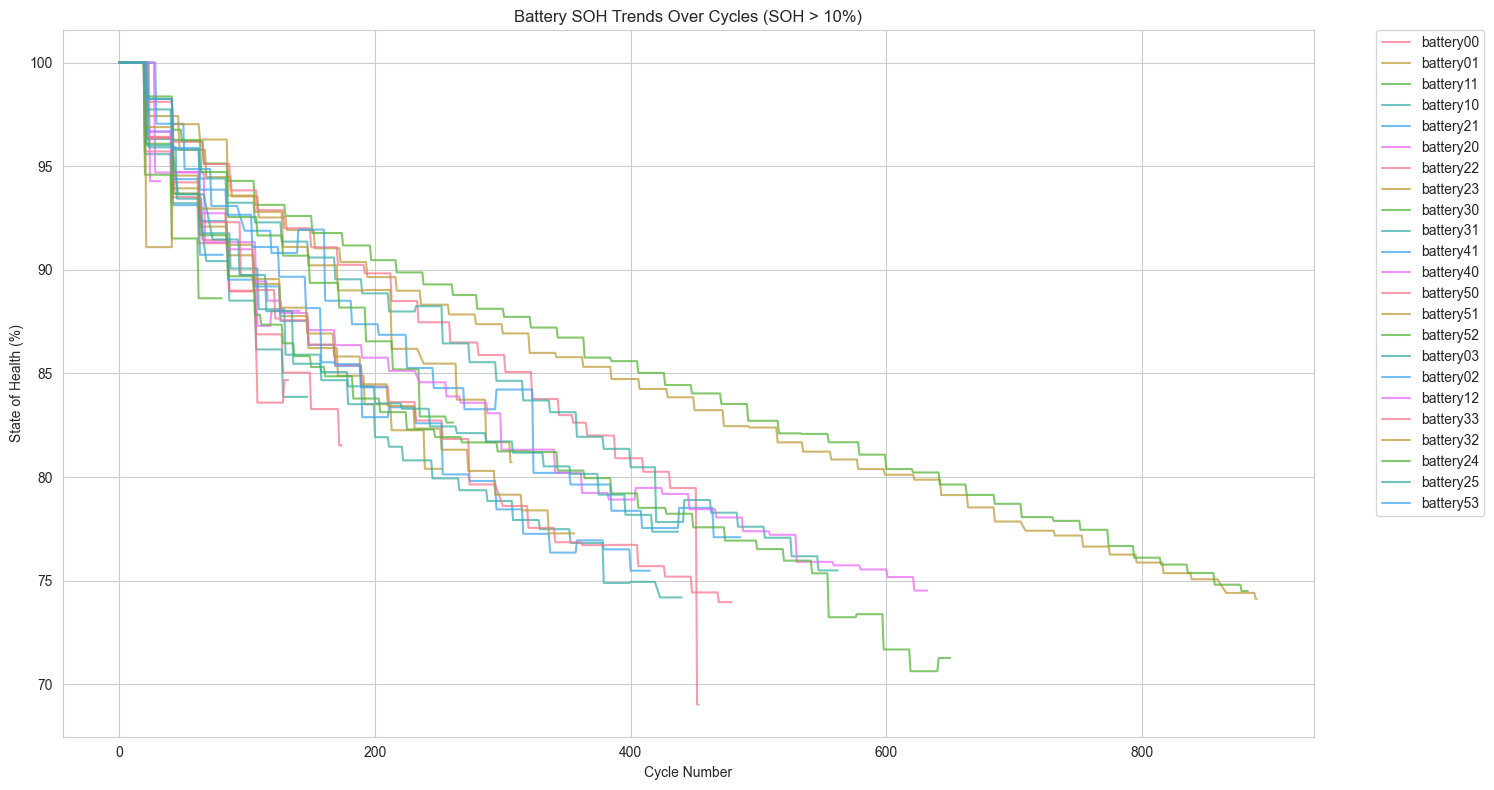


EOL (End of Life) Statistics for Each Battery (SOH > 10%):
            EOL_SOH_%  Final_SOH_%  Last_Cycle
battery_id                                    
battery22       69.02        69.02         453
battery24       70.63        71.27         650
battery33       73.97        73.97         479
battery01       74.12        74.12         890
battery03       74.19        74.19         440
battery11       74.50        74.50         883
battery12       74.53        74.53         632
battery02       75.48        75.48         415
battery31       75.50        75.50         562
battery41       77.10        77.10         486
battery32       77.28        77.28         356
battery25       77.36        77.36         437
battery23       80.40        80.40         252
battery51       80.71        80.71         307
battery00       81.53        81.53         174
battery52       82.63        82.63         261
battery50       83.59        84.68         132
battery10       83.87        83.87         147


In [11]:
# Filter out values close to 0 (let's say SOH < 10%)
df_filtered = df[df['SOH_%'] > 10]

# Create a figure for SOH analysis
plt.figure(figsize=(15, 8))

# Plot SOH trends for each battery
for battery in df_filtered['battery_id'].unique():
    battery_data = df_filtered[df_filtered['battery_id'] == battery]
    plt.plot(battery_data['cycle_number'], battery_data['SOH_%'], 
             label=battery, alpha=0.7)

# Add labels and title
plt.xlabel('Cycle Number')
plt.ylabel('State of Health (%)')
plt.title('Battery SOH Trends Over Cycles (SOH > 10%)')
plt.grid(True)

# Add legend with a reasonable number of entries
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and display EOL statistics for filtered data
print("\nEOL (End of Life) Statistics for Each Battery (SOH > 10%):")
eol_stats = df_filtered.groupby('battery_id').agg({
    'SOH_%': ['min', 'last'],  # min for EOL, last for final SOH
    'cycle_number': 'max'  # last cycle number
}).round(2)

eol_stats.columns = ['EOL_SOH_%', 'Final_SOH_%', 'Last_Cycle']
print(eol_stats.sort_values('EOL_SOH_%', ascending=True))

# Calculate and display average final SOH
avg_final_soh = eol_stats['Final_SOH_%'].mean()
median_final_soh = eol_stats['Final_SOH_%'].median()
print(f"\nAverage Final SOH across all batteries: {avg_final_soh:.2f}%")
print(f"Median Final SOH across all batteries: {median_final_soh:.2f}%")

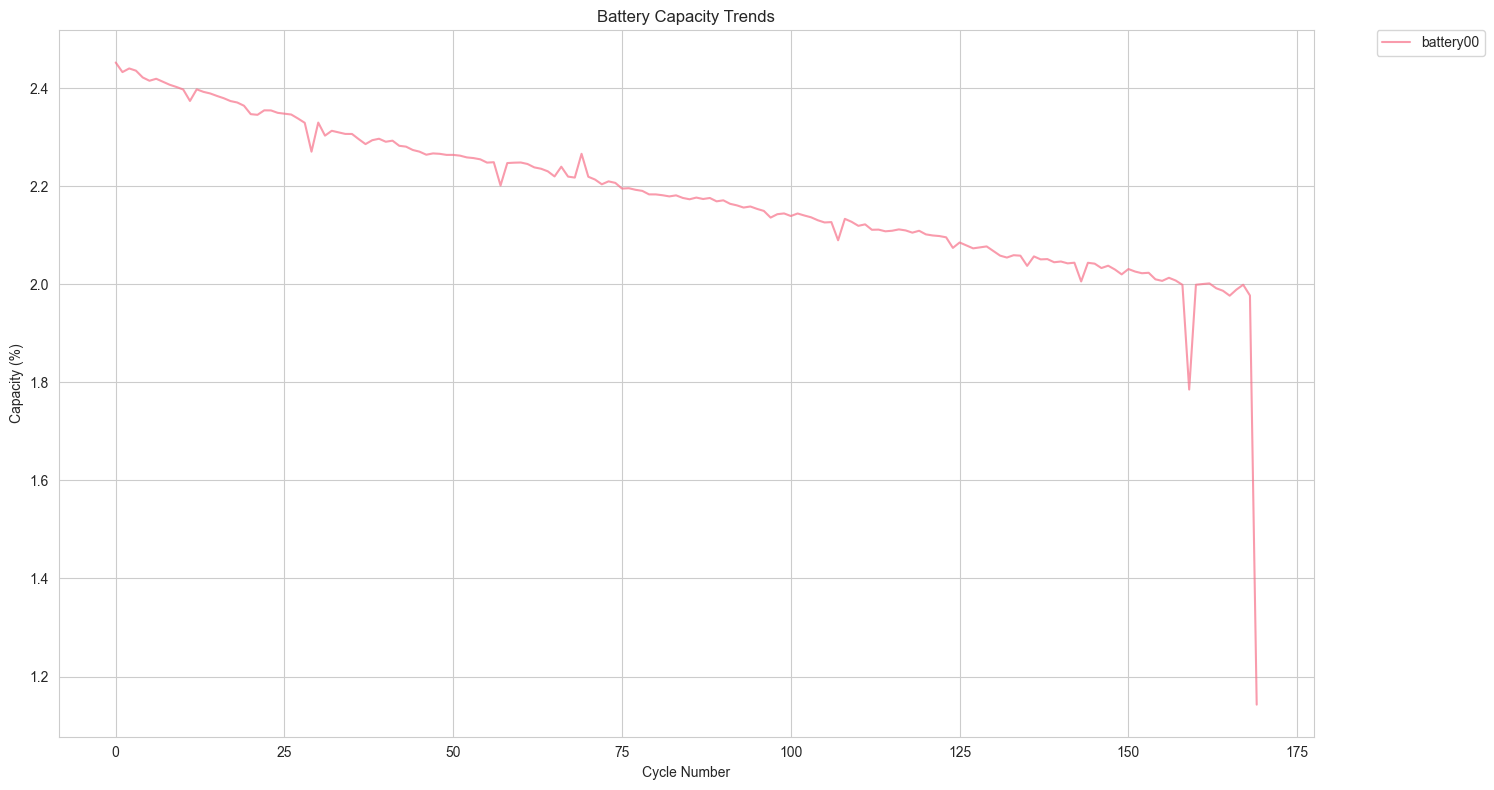

In [3]:
df_filtered = df
# Create a figure for SOH analysis
plt.figure(figsize=(15, 8))

# Plot SOH trends for each battery
# Get first 5 unique battery IDs
unique_batteries = df_filtered['battery_id'].unique()[:1]

# Plot capacity trends for each of these 5 batteries
for battery in unique_batteries:
    battery_data = df_filtered[df_filtered['battery_id'] == battery]
    plt.plot(battery_data['cycle_number'], battery_data['capacity_Ah'], 
             label=battery, alpha=0.7)

# Add labels and title
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (%)')
plt.title('Battery Capacity Trends')
plt.grid(True)

# Add legend with a reasonable number of entries
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

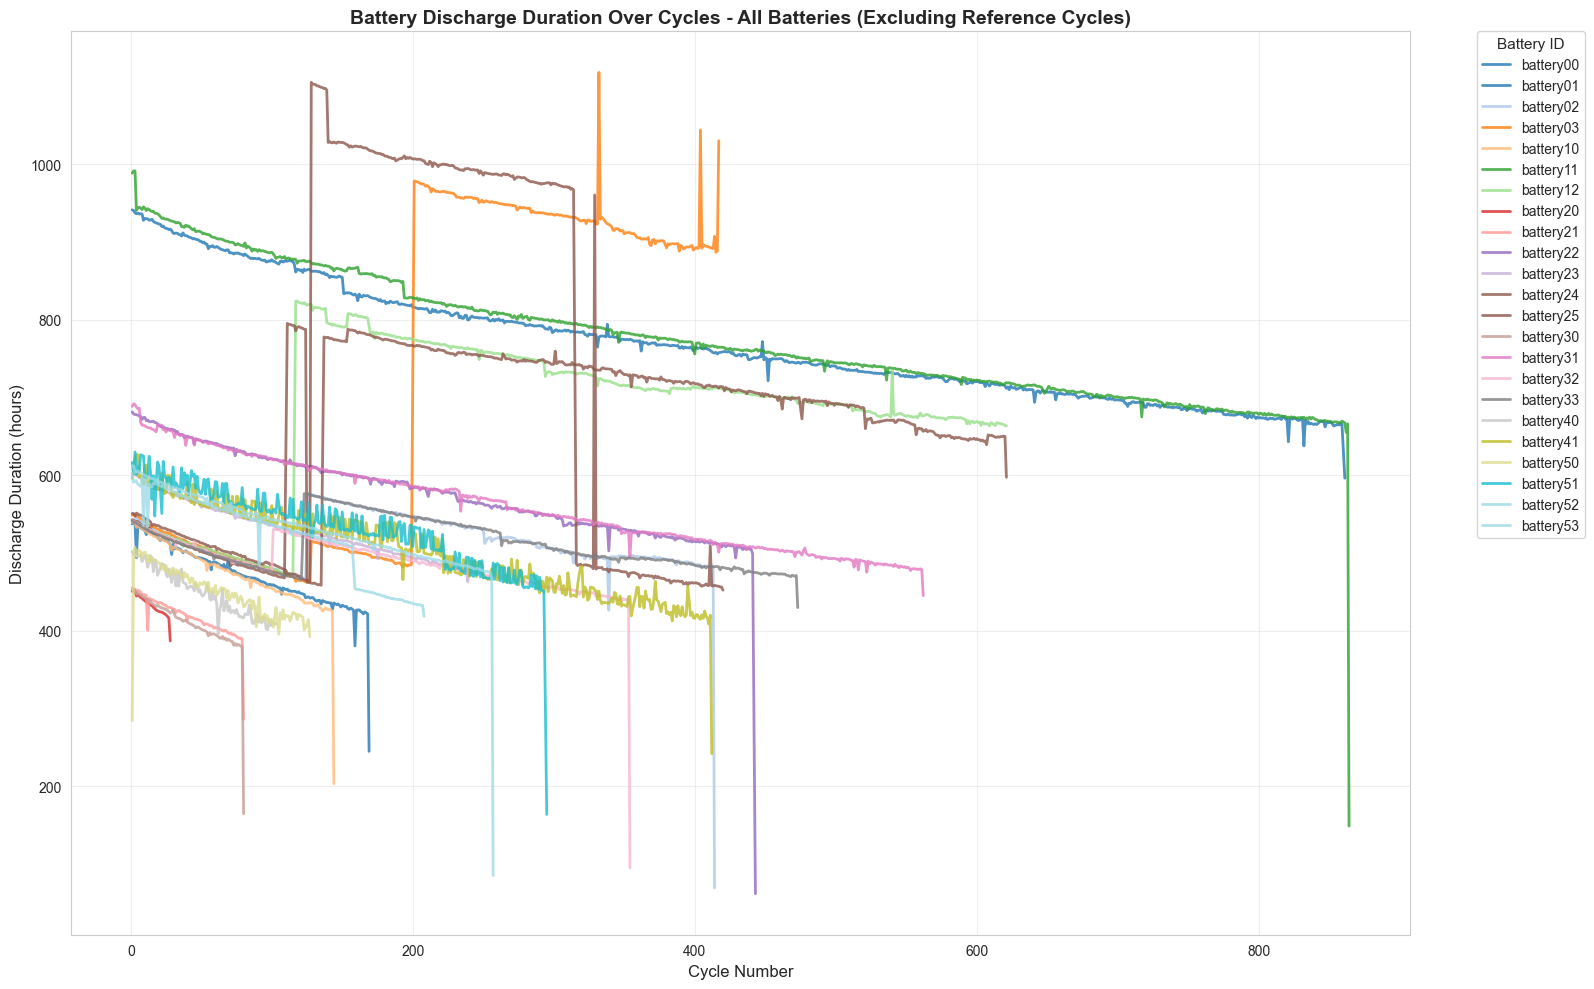


Discharge Duration Statistics by Battery (Excluding Reference Cycles):
            Mean_Hours  Std_Hours  Min_Hours  Max_Hours  Cycle_Count
battery_id                                                          
battery11      774.354     79.193    148.528    991.735          822
battery01      767.029     72.370    596.171    941.554          820
battery03      725.965    217.826    462.170   1118.413          397
battery25      720.958    257.910    452.101   1105.698          401
battery12      684.548     95.416    472.218    824.179          590
battery24      677.640     96.771    458.436    795.426          589
battery22      577.411     54.882     61.542    681.598          421
battery31      561.064     55.445    445.139    692.009          536
battery51      534.334     50.250    163.631    629.889          281
battery52      531.713     46.824     84.850    612.137          245
battery23      529.432     34.288    462.997    602.527          233
battery53      523.421     51.2

In [6]:
# Create a figure for discharge duration analysis (excluding reference cycles)
plt.figure(figsize=(16, 10))

# Filter out reference cycles
df_non_ref = df[df['is_reference_cycle'] == False]

# Get all unique batteries from filtered data
unique_batteries_non_ref = df_non_ref['battery_id'].unique()

# Create a color palette with enough distinct colors
colors_non_ref = plt.cm.tab20(np.linspace(0, 1, len(unique_batteries_non_ref)))

# Plot discharge duration trends for each battery (excluding reference cycles)
for i, battery in enumerate(unique_batteries_non_ref):
    battery_data = df_non_ref[df_non_ref['battery_id'] == battery]
    plt.plot(battery_data['cycle_number'], battery_data['discharge_duration_s'], 
             label=battery, alpha=0.8, linewidth=2, color=colors_non_ref[i])

# Customize the plot
plt.xlabel('Cycle Number', fontsize=12)
plt.ylabel('Discharge Duration (hours)', fontsize=12)
plt.title('Battery Discharge Duration Over Cycles - All Batteries (Excluding Reference Cycles)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Position legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
           fontsize=10, title='Battery ID', title_fontsize=11)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Display summary statistics for discharge duration (excluding reference cycles)
print("\nDischarge Duration Statistics by Battery (Excluding Reference Cycles):")
duration_stats_non_ref = df_non_ref.groupby('battery_id')['discharge_duration_s'].agg([
    'mean', 'std', 'min', 'max', 'count'
]).round(3)
duration_stats_non_ref.columns = ['Mean_Hours', 'Std_Hours', 'Min_Hours', 'Max_Hours', 'Cycle_Count']
print(duration_stats_non_ref.sort_values('Mean_Hours', ascending=False))

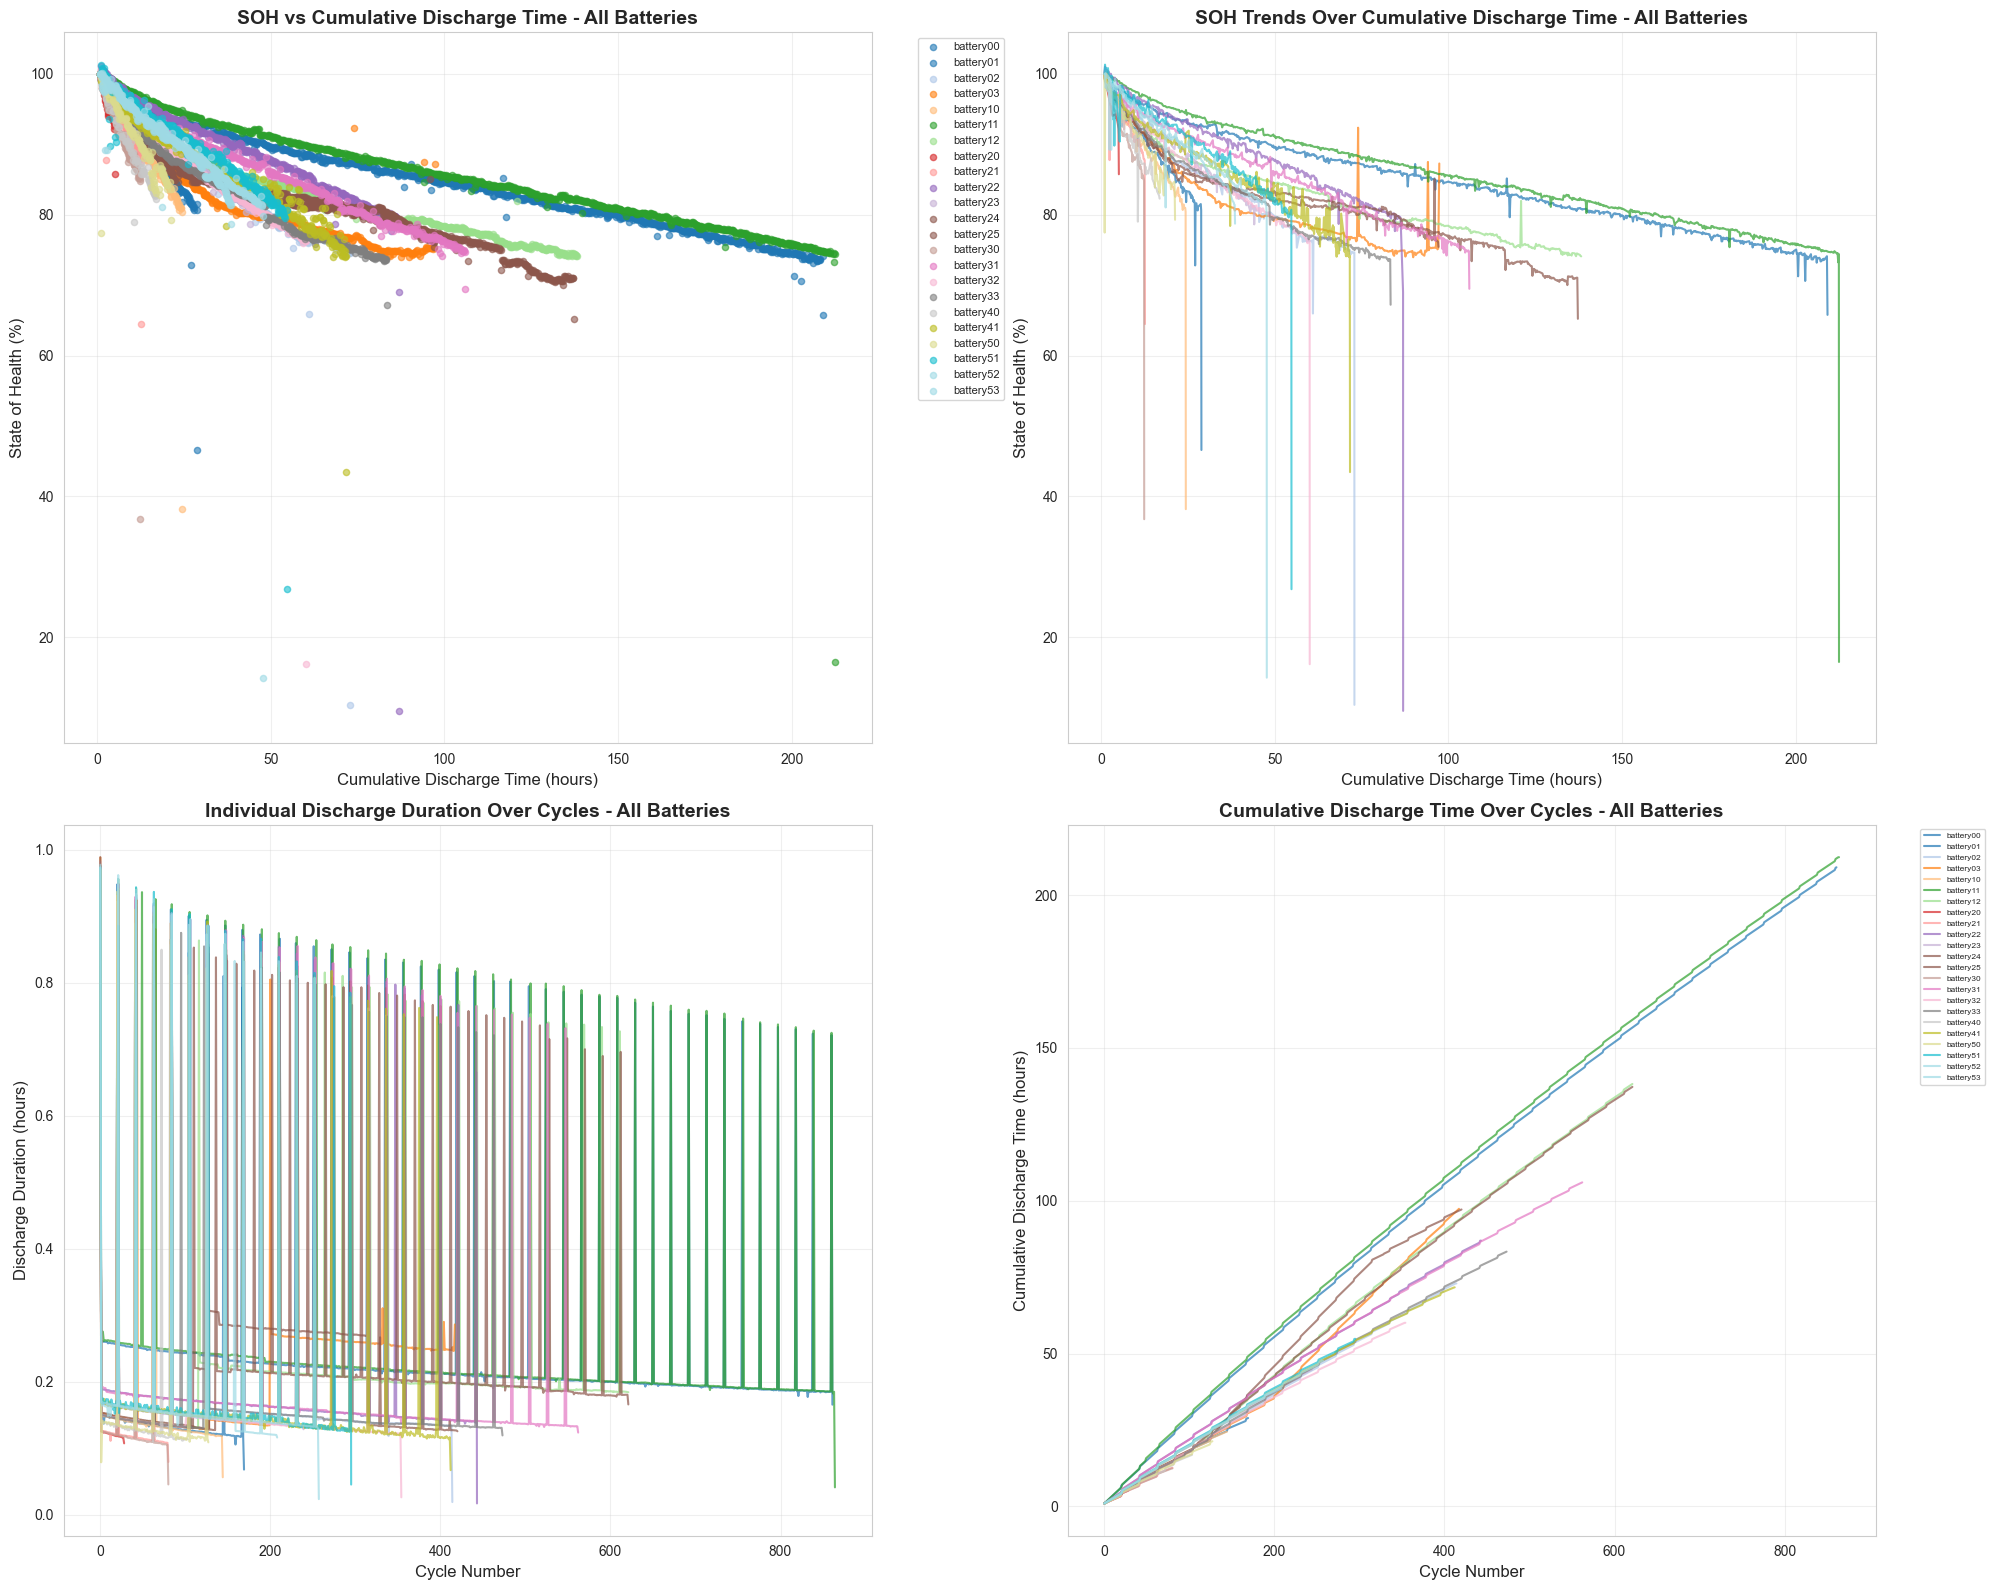


Cumulative Discharge Time Statistics by Battery:
            Total_Discharge_Hours  Cycle_Count
battery_id                                    
battery11                  212.43          865
battery01                  209.13          862
battery12                  138.22          622
battery24                  137.27          622
battery31                  106.02          563
battery03                   97.37          418
battery25                   97.15          421
battery22                   86.96          444
battery33                   83.36          474
battery02                   72.94          415
battery41                   71.67          413
battery32                   60.07          355
battery51                   54.82          296
battery52                   47.71          258
battery23                   44.75          245
battery53                   38.57          209
battery00                   28.89          170
battery10                   24.40          145
battery50 

/var/folders/tp/c04r6psx0w9cn41_w3lfjky00000gn/T/ipykernel_35043/2553444230.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cumtime_correlation_stats = df_with_cumtime.groupby('battery_id').apply(


In [8]:
# Create a comprehensive figure with cumulative time analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Get unique batteries for consistent coloring
unique_batteries_all = df['battery_id'].unique()
colors_all = plt.cm.tab20(np.linspace(0, 1, len(unique_batteries_all)))

# Calculate cumulative discharge time for each battery
df_with_cumtime = df.copy()
df_with_cumtime['cumulative_discharge_time_h'] = df_with_cumtime.groupby('battery_id')['discharge_duration_s'].cumsum() / 3600

# Subplot 1: SOH vs Cumulative Discharge Time (scatter plot)
ax1 = axes[0, 0]
for i, battery in enumerate(unique_batteries_all):
    battery_data_plot = df_with_cumtime[df_with_cumtime['battery_id'] == battery]
    ax1.scatter(battery_data_plot['cumulative_discharge_time_h'], battery_data_plot['SOH_cycle_capacity_%'], 
               alpha=0.6, s=20, color=colors_all[i], label=battery)

ax1.set_xlabel('Cumulative Discharge Time (hours)', fontsize=12)
ax1.set_ylabel('State of Health (%)', fontsize=12)
ax1.set_title('SOH vs Cumulative Discharge Time - All Batteries', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Subplot 2: SOH trends over cumulative time
ax2 = axes[0, 1]
for i, battery in enumerate(unique_batteries_all):
    battery_data_plot = df_with_cumtime[df_with_cumtime['battery_id'] == battery]
    ax2.plot(battery_data_plot['cumulative_discharge_time_h'], battery_data_plot['SOH_cycle_capacity_%'], 
            alpha=0.7, linewidth=1.5, color=colors_all[i], label=battery)

ax2.set_xlabel('Cumulative Discharge Time (hours)', fontsize=12)
ax2.set_ylabel('State of Health (%)', fontsize=12)
ax2.set_title('SOH Trends Over Cumulative Discharge Time - All Batteries', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Subplot 3: Individual discharge duration vs cycle number
ax3 = axes[1, 0]
for i, battery in enumerate(unique_batteries_all):
    battery_data_plot = df_with_cumtime[df_with_cumtime['battery_id'] == battery]
    ax3.plot(battery_data_plot['cycle_number'], battery_data_plot['discharge_duration_s'] / 3600, 
            alpha=0.7, linewidth=1.5, color=colors_all[i], label=battery)

ax3.set_xlabel('Cycle Number', fontsize=12)
ax3.set_ylabel('Discharge Duration (hours)', fontsize=12)
ax3.set_title('Individual Discharge Duration Over Cycles - All Batteries', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Subplot 4: Cumulative discharge time vs cycle number
ax4 = axes[1, 1]
for i, battery in enumerate(unique_batteries_all):
    battery_data_plot = df_with_cumtime[df_with_cumtime['battery_id'] == battery]
    ax4.plot(battery_data_plot['cycle_number'], battery_data_plot['cumulative_discharge_time_h'], 
            alpha=0.7, linewidth=1.5, color=colors_all[i], label=battery)

ax4.set_xlabel('Cycle Number', fontsize=12)
ax4.set_ylabel('Cumulative Discharge Time (hours)', fontsize=12)
ax4.set_title('Cumulative Discharge Time Over Cycles - All Batteries', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)

# Adjust layout
plt.tight_layout()
plt.show()

# Display cumulative time statistics
print("\nCumulative Discharge Time Statistics by Battery:")
cumtime_stats = df_with_cumtime.groupby('battery_id')['cumulative_discharge_time_h'].agg([
    'max', 'count'
]).round(2)
cumtime_stats.columns = ['Total_Discharge_Hours', 'Cycle_Count']
print(cumtime_stats.sort_values('Total_Discharge_Hours', ascending=False))

# Display correlation between SOH and cumulative time
print("\nCorrelation Analysis between SOH and Cumulative Discharge Time:")
cumtime_correlation_stats = df_with_cumtime.groupby('battery_id').apply(
    lambda x: x['SOH_cycle_capacity_%'].corr(x['cumulative_discharge_time_h'])
).round(3)
cumtime_correlation_stats.name = 'SOH_CumTime_Correlation'
print(cumtime_correlation_stats.sort_values(ascending=False))

print(f"\nOverall correlation between SOH and Cumulative Discharge Time: {df_with_cumtime['SOH_cycle_capacity_%'].corr(df_with_cumtime['cumulative_discharge_time_h']):.3f}")